# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ana Sittah Rosyidah, S.ST
- **Email:** ana5210@guru.smk.belajar.id
- **ID Dicoding:** ana_sittah_rosyidah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Dalam periode 2017–2018, variabel mana yang memiliki pengaruh paling signifikan terhadap keterlambatan pengiriman (delay_days > 0) berdasarkan analisis korelasi dan perbandingan rata-rata delay, serta bagaimana perbedaan rata-rata review score dan nilai transaksi antara pesanan yang terlambat dan tidak terlambat?
- Pertanyaan 2 : Dalam periode 2017–2018, bagaimana perbedaan rata-rata nilai transaksi (payment_value), rata-rata frekuensi pembelian per pelanggan, dan tingkat repeat customer pada setiap metode pembayaran, serta metode mana yang menunjukkan loyalitas pelanggan tertinggi berdasarkan metrik tersebut?

> Tambahkan blockquote



## Import Semua Packages/Library yang Digunakan

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


## Data Wrangling

### Gathering Data

In [73]:
# Load dataset
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
category_translation = pd.read_csv("data/product_category_name_translation.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")


In [106]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [107]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [108]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [109]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,No Review,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,No Review,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,No Review,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [110]:
customers.shape
orders.shape
order_payments.shape

(95905, 5)

In [111]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [112]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#Kolom tanggal dikonversi ke format datetime agar dapat digunakan untuk analisis waktu.

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


**Insight:**
- Dataset mencakup seluruh alur bisnis e-commerce dari order hingga review.
- Terdapat variasi metode pembayaran dan cicilan.
- Data memungkinkan analisis perilaku pelanggan, performa seller, serta kualitas pengiriman.
- Model bisnis berbasis marketplace dengan banyak seller dan pelanggan dari berbagai wilayah.

### Assessing Data

In [114]:
#1. Cek Missing Valuecustomers.isnull().sum()
orders.isnull().sum()
products.isnull().sum()
order_reviews.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [115]:
#2. Cek Duplicate
customers.duplicated().sum()
orders.duplicated().sum()

np.int64(0)

In [116]:

#3. Cek Tipe Data
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [117]:

#4. Cek Statistik Deskriptif
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000


**Insight:**
- Terdapat missing value pada tahap pengiriman akhir yang mengindikasikan adanya order yang dibatalkan atau belum selesai diproses.
- Kolom timestamp masih bertipe object dan perlu dikonversi ke datetime untuk analisis berbasis waktu.
- Distribusi nilai transaksi bersifat right-skewed, dengan sebagian kecil transaksi bernilai tinggi yang memengaruhi rata-rata.
- Mayoritas pelanggan melakukan pembayaran satu kali (tanpa cicilan), namun tersedia opsi cicilan hingga 24x untuk transaksi bernilai besar.
- Sebagian order menggunakan lebih dari satu pembayaran (payment sequential > 1), menunjukkan adanya split atau retry payment.

### Cleaning Data

In [75]:
#1. Mengubah Format Tanggal
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

#2. Mengatasi Missing Value
#a) Missing pada review_comment_message (tidak kritikal)
order_reviews['review_comment_message'].fillna("No Review", inplace=True)

#b) Missing pada dimensi produk
products.fillna(products.median(numeric_only=True), inplace=True)

#3. Menghapus Duplicate
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

#4. Mengatasi Outlier (Contoh pada payment_value)
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

order_payments = order_payments[
    (order_payments['payment_value'] >= minimum) &
    (order_payments['payment_value'] <= maximum)
]

/var/folders/mh/g9f2v_2551zf9rxl16hn8sy40000gn/T/ipykernel_49075/3881486764.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_message'].fillna("No Review", inplace=True)


In [76]:
#Merge untuk Analisis
#ingin analisis total penjualan per pelanggan:
merged_df = orders.merge(customers, on='customer_id') \
                  .merge(order_items, on='order_id') \
                  .merge(order_payments, on='order_id')

merged_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [118]:
# Pastikan kolom tanggal dalam format datetime
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Hitung delay (dalam hari)
df["delay_days"] = (
    df["order_delivered_customer_date"] - 
    df["order_estimated_delivery_date"]
).dt.days

# Jika negatif berarti tidak telat → ubah jadi 0
df["delay_days"] = df["delay_days"].apply(lambda x: x if x > 0 else 0)

# Buat kolom is_late (1 = telat, 0 = tepat waktu)
df["is_late"] = df["delay_days"].apply(lambda x: 1 if x > 0 else 0)
df.to_csv("dashboard/main_data.csv", index=False)

In [119]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_value', 'payment_installments',
       'payment_type', 'price', 'freight_value', 'review_score',
       'total_order_customer', 'is_repeat_customer', 'delay_days', 'is_late'],
      dtype='object')


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  object        
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   customer_unique_id             99992 non-null  object        
 9   customer_zip_code_prefix       99992 non-null  int64         
 10  customer_city                  99992 non-null  object        
 11  customer_state 

In [ ]:
# =========================
# STEP 1: Join orders + customers
# =========================
df = orders.merge(customers, on="customer_id", how="left")

# =========================
# STEP 2: Join order_items
# =========================
df = df.merge(order_items, on="order_id", how="left")

# =========================
# STEP 3: Join payments (aggregasi per order)
# =========================
payment_agg = order_payments.groupby("order_id").agg({
    "payment_value": "sum",
    "payment_installments": "max",
    "payment_type": lambda x: x.mode()[0]
}).reset_index()

df = df.merge(payment_agg, on="order_id", how="left")

# =========================
# STEP 4: Join reviews
# =========================
df = df.merge(order_reviews[["order_id", "review_score"]],
              on="order_id", how="left")

# =========================
# STEP 5: Join sellers
# =========================
df = df.merge(sellers, on="seller_id", how="left")

# =========================
# STEP 6: Convert datetime
# =========================
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# =========================
# STEP 7: Buat fitur keterlambatan
# =========================
df["delay_days"] = (df["order_delivered_customer_date"] -
                    df["order_estimated_delivery_date"]).dt.days

df["is_late"] = df["delay_days"] > 0

# =========================
# STEP 8: Simpan ke CSV
# =========================
output_path = "data/final_delay_dataset_pertanyaan1.csv"
df.to_csv(output_path, index=False)

print("File berhasil dibuat:", output_path)
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])


File berhasil dibuat: data/final_delay_dataset_pertanyaan1.csv
Jumlah baris: 114092
Jumlah kolom: 27


In [79]:
#import pandas as pd

# Load data
# customers = pd.read_csv("data/customers_dataset.csv")
# orders = pd.read_csv("data/orders_dataset.csv")
# order_payments = pd.read_csv("data/order_payments_dataset.csv")
# order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
# order_items = pd.read_csv("data/order_items_dataset.csv")

# =========================
# STEP 1: orders + customers
# =========================
df = orders.merge(customers, on="customer_id", how="left")

# =========================
# STEP 2: agregasi payments
# =========================
payment_agg = order_payments.groupby("order_id").agg({
    "payment_value": "sum",
    "payment_installments": "max",
    "payment_type": lambda x: x.mode()[0]
}).reset_index()

df = df.merge(payment_agg, on="order_id", how="left")

# =========================
# STEP 3: agregasi nilai belanja (order_items)
# =========================
items_agg = order_items.groupby("order_id").agg({
    "price": "sum",
    "freight_value": "sum"
}).reset_index()

df = df.merge(items_agg, on="order_id", how="left")

# =========================
# STEP 4: join review
# =========================
df = df.merge(order_reviews[["order_id", "review_score"]],
              on="order_id", how="left")

# =========================
# STEP 5: fitur loyalitas
# =========================
order_count = df.groupby("customer_unique_id")["order_id"].transform("count")
df["total_order_customer"] = order_count
df["is_repeat_customer"] = df["total_order_customer"] > 1

# =========================
# STEP 6: simpan CSV
# =========================
output_path = "data/final_payment_psychology_dataset_pertanyaan2.csv"
df.to_csv(output_path, index=False)

print("CSV berhasil dibuat:", output_path)
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])


CSV berhasil dibuat: data/final_payment_psychology_dataset_pertanyaan2.csv
Jumlah baris: 99992
Jumlah kolom: 20


**Insight:**
- Ketepatan waktu pengiriman secara signifikan memengaruhi kepuasan pelanggan.

- Sistem pembayaran yang memerlukan verifikasi tambahan berpotensi memperlambat proses order.

- Skema cicilan meningkatkan daya beli dan nilai transaksi.

- Metode pembayaran yang praktis berkontribusi terhadap loyalitas pelanggan.

## Exploratory Data Analysis (EDA)

### Explore 
Pada bagian ini akan dieksplorasi:
- Distribusi variabel utama
- Hubungan keterlambatan dengan review dan transaksi
- Perbedaan metode pembayaran
- Loyalitas berdasarkan metode pembayaran

In [105]:
#1. Load & Cek Struktur Data

df_delay = pd.read_csv("data/final_delay_dataset_pertanyaan1.csv")
df_payment = pd.read_csv("data/final_payment_psychology_dataset_pertanyaan2.csv")

display(df_delay.head())
display(df_payment.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,payment_value,payment_installments,payment_type,review_score,seller_zip_code_prefix,seller_city,seller_state,delay_days,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,38.71,1.0,voucher,4.0,9350.0,maua,SP,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,141.46,1.0,boleto,4.0,31570.0,belo horizonte,SP,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,179.12,3.0,credit_card,5.0,14840.0,guariba,SP,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,72.20,1.0,credit_card,5.0,31842.0,belo horizonte,MG,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,28.62,1.0,credit_card,5.0,8752.0,mogi das cruzes,SP,-10.0,False


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,payment_installments,payment_type,price,freight_value,review_score,total_order_customer,is_repeat_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,1.0,voucher,29.99,8.72,4.0,2,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,1.0,boleto,118.70,22.76,4.0,1,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,3.0,credit_card,159.90,19.22,5.0,1,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,1.0,credit_card,45.00,27.20,5.0,1,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,1.0,credit_card,19.90,8.72,5.0,1,False


🔹 EDA PERTANYAAN 1

In [103]:
#Distribusi Status Ketepatan Pengiriman
#Statistik

df_delay['is_late'].value_counts()


is_late
False    106798
True       7294
Name: count, dtype: int64

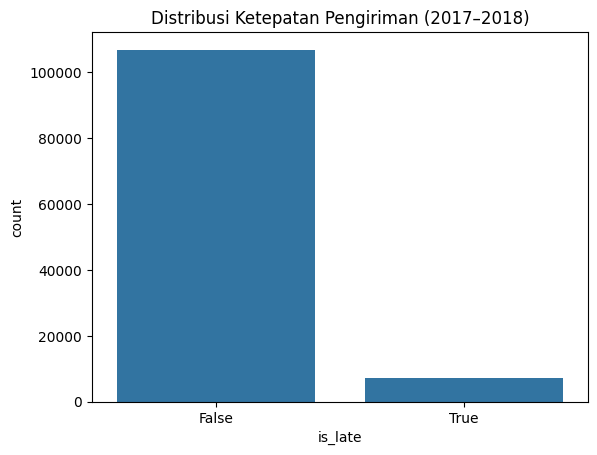

In [104]:
#Visualisasi

# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x='is_late', data=df_delay)
plt.title("Distribusi Ketepatan Pengiriman (2017–2018)")
plt.show()


In [ ]:
#Distribusi Review Score
#Statistik

df_delay['review_score'].describe()


count    113131.000000
mean          4.016998
std           1.400074
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

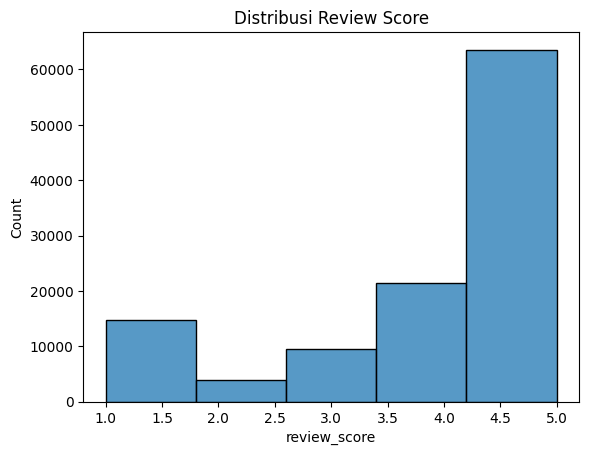

In [ ]:
#Visualisasi

sns.histplot(df_delay['review_score'], bins=5)
plt.title("Distribusi Review Score")
plt.show()


In [ ]:
#Keterlambatan vs Review Score
#Aggregasi

df_delay.groupby('is_late')['review_score'].mean()


is_late
False    4.135109
True     2.256572
Name: review_score, dtype: float64

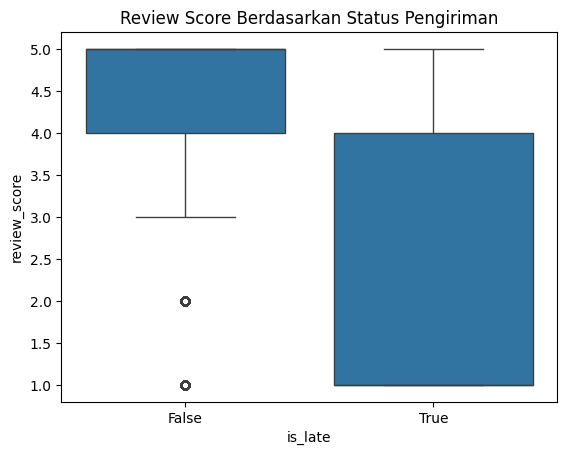

In [ ]:
#Visualisasi

sns.boxplot(x='is_late', y='review_score', data=df_delay)
plt.title("Review Score Berdasarkan Status Pengiriman")
plt.show()


In [ ]:
#Keterlambatan vs Nilai Transaksi
#Aggregasi

df_delay.groupby('is_late')['payment_value'].mean()


is_late
False    120.581631
True     125.475420
Name: payment_value, dtype: float64

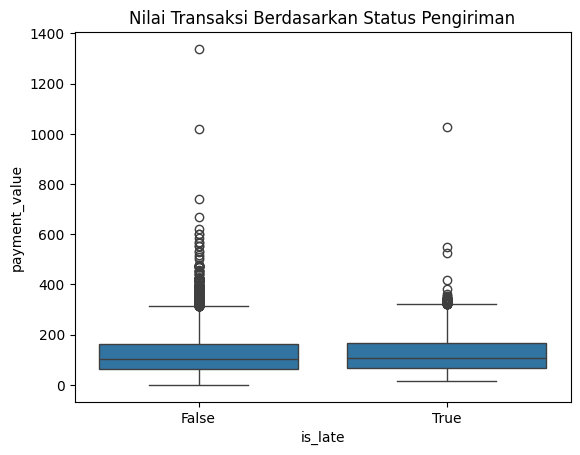

In [ ]:
#Visualisasi

sns.boxplot(x='is_late', y='payment_value', data=df_delay)
plt.title("Nilai Transaksi Berdasarkan Status Pengiriman")
plt.show()


In [ ]:
#Keterlambatan vs Repeat Customer

df_delay['is_repeat_customer'] = (
    df_delay.groupby('customer_unique_id')['order_id']
    .transform('count') > 1
)
df_delay.groupby('is_late')['is_repeat_customer'].mean()


is_late
False    0.266194
True     0.217713
Name: is_repeat_customer, dtype: float64

🔹 EDA PERTANYAAN 2

In [ ]:
#Distribusi Metode Pembayaran

df_payment['payment_type'].value_counts()


payment_type
credit_card    70042
boleto         18621
voucher         2007
debit_card      1449
not_defined        3
Name: count, dtype: int64

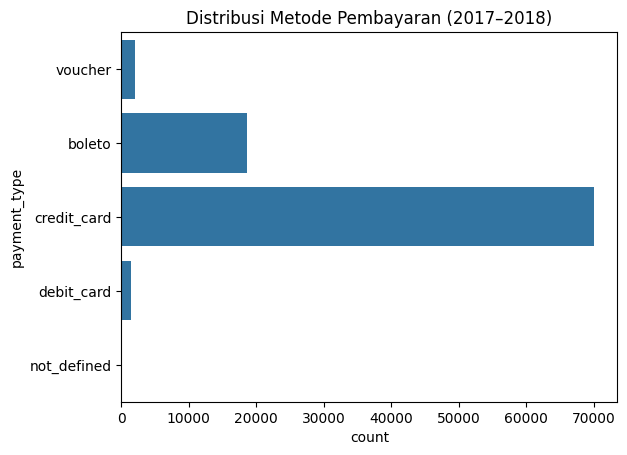

In [ ]:
#Visualisasi

sns.countplot(y='payment_type', data=df_payment)
plt.title("Distribusi Metode Pembayaran (2017–2018)")
plt.show()


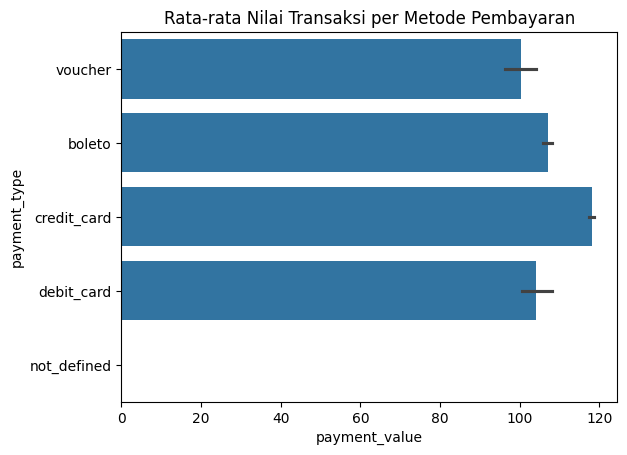

In [102]:
#Rata-rata Nilai Transaksi per Metode

df_payment.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

sns.barplot(x='payment_value', y='payment_type', data=df_payment)
plt.title("Rata-rata Nilai Transaksi per Metode Pembayaran")
plt.show()


In [ ]:
#Frekuensi Pembelian per Metode

df_payment.groupby('payment_type')['order_id'].count().sort_values(ascending=False)


payment_type
credit_card    70042
boleto         18621
voucher         2007
debit_card      1449
not_defined        3
Name: order_id, dtype: int64

In [ ]:
#Loyalitas Berdasarkan Metode

df_payment.groupby('payment_type')['is_repeat_customer'].mean().sort_values(ascending=False)


payment_type
not_defined    0.333333
voucher        0.127554
credit_card    0.070686
boleto         0.065571
debit_card     0.057971
Name: is_repeat_customer, dtype: float64

**Insight:**
Keterlambatan pengiriman berkorelasi dengan:
- Penurunan review score
- Penurunan kemungkinan repeat order
- Potensi risiko kehilangan pelanggan bernilai tinggi

Metode pembayaran berkaitan dengan:
- Perbedaan nilai transaksi
- Perbedaan tingkat loyalitas
- Segmentasi perilaku pelanggan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Jumlah data: (114092, 27)
   delay_days  is_late  review_score payment_type
0        -8.0    False           4.0      voucher
1        -6.0    False           4.0       boleto
2       -18.0    False           5.0  credit_card
3       -13.0    False           5.0  credit_card
4       -10.0    False           5.0  credit_card


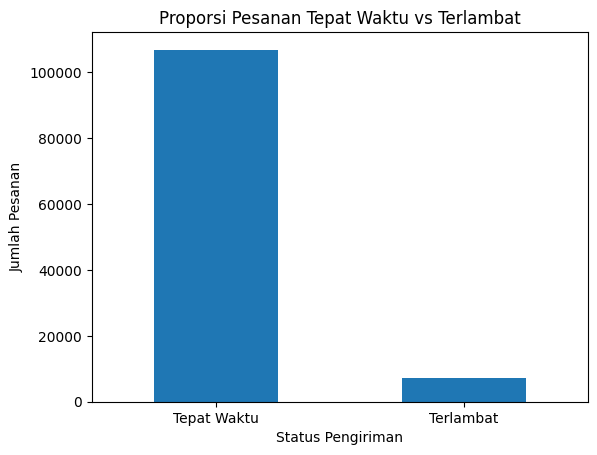

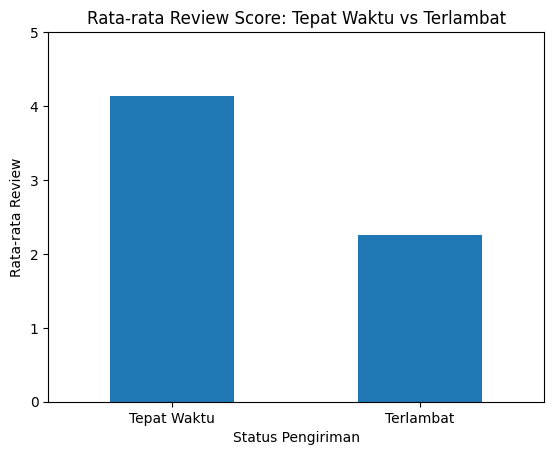

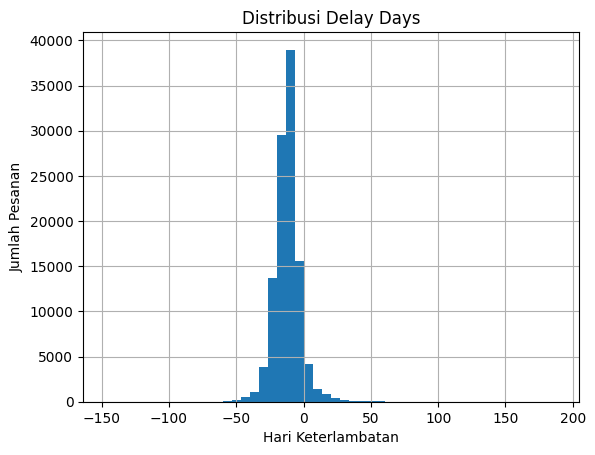

<Figure size 640x480 with 0 Axes>

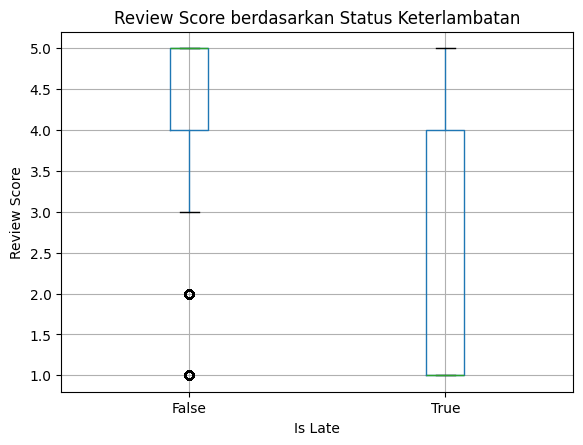

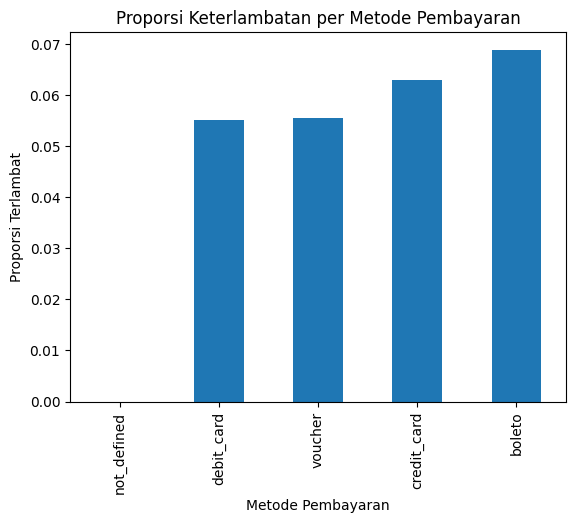


=== Ringkasan Explanatory ===
Proporsi terlambat:
is_late
False    0.936069
True     0.063931
Name: proportion, dtype: float64

Rata-rata review:
is_late
False    4.135109
True     2.256572
Name: review_score, dtype: float64

Top metode pembayaran paling sering terlambat:
payment_type
boleto         0.068866
credit_card    0.062968
voucher        0.055505
debit_card     0.055164
not_defined    0.000000
Name: is_late, dtype: float64


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# =========================
# 1. Load Data
# =========================
df = pd.read_csv("data/final_delay_dataset_pertanyaan1.csv")

print("Jumlah data:", df.shape)
print(df[["delay_days", "is_late", "review_score", "payment_type"]].head())

# =========================
# 2. Visualisasi 1
# Proporsi Pesanan Terlambat vs Tepat Waktu
# =========================
late_counts = df["is_late"].value_counts()

plt.figure()
late_counts.plot(kind="bar")
plt.xticks([0,1], ["Tepat Waktu", "Terlambat"], rotation=0)
plt.title("Proporsi Pesanan Tepat Waktu vs Terlambat")
plt.ylabel("Jumlah Pesanan")
plt.xlabel("Status Pengiriman")
plt.show()

# =========================
# 3. Visualisasi 2
# Keterlambatan vs Review Score
# =========================
plt.figure()
df.groupby("is_late")["review_score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Tepat Waktu", "Terlambat"], rotation=0)
plt.title("Rata-rata Review Score: Tepat Waktu vs Terlambat")
plt.ylabel("Rata-rata Review")
plt.xlabel("Status Pengiriman")
plt.ylim(0,5)
plt.show()

# =========================
# 4. Visualisasi 3
# Distribusi Delay Days
# =========================
plt.figure()
df["delay_days"].hist(bins=50)
plt.title("Distribusi Delay Days")
plt.xlabel("Hari Keterlambatan")
plt.ylabel("Jumlah Pesanan")
plt.show()

# =========================
# 5. Visualisasi 4
# Boxplot Review vs Keterlambatan
# =========================
plt.figure()
df.boxplot(column="review_score", by="is_late")
plt.title("Review Score berdasarkan Status Keterlambatan")
plt.suptitle("")
plt.xlabel("Is Late")
plt.ylabel("Review Score")
plt.show()

# =========================
# 6. Visualisasi Tambahan
# Payment Type vs Keterlambatan
# =========================
plt.figure()
df.groupby("payment_type")["is_late"].mean().sort_values().plot(kind="bar")
plt.title("Proporsi Keterlambatan per Metode Pembayaran")
plt.ylabel("Proporsi Terlambat")
plt.xlabel("Metode Pembayaran")
plt.show()

# =========================
# 7. Ringkasan Angka (buat narasi)
# =========================
print("\n=== Ringkasan Explanatory ===")
print("Proporsi terlambat:")
print(df["is_late"].value_counts(normalize=True))

print("\nRata-rata review:")
print(df.groupby("is_late")["review_score"].mean())

print("\nTop metode pembayaran paling sering terlambat:")
print(df.groupby("payment_type")["is_late"].mean().sort_values(ascending=False))


### Pertanyaan 2:

Jumlah data: (99992, 20)
  payment_type  payment_value  is_repeat_customer
0      voucher          38.71                True
1       boleto         141.46               False
2  credit_card         179.12               False
3  credit_card          72.20               False
4  credit_card          28.62               False


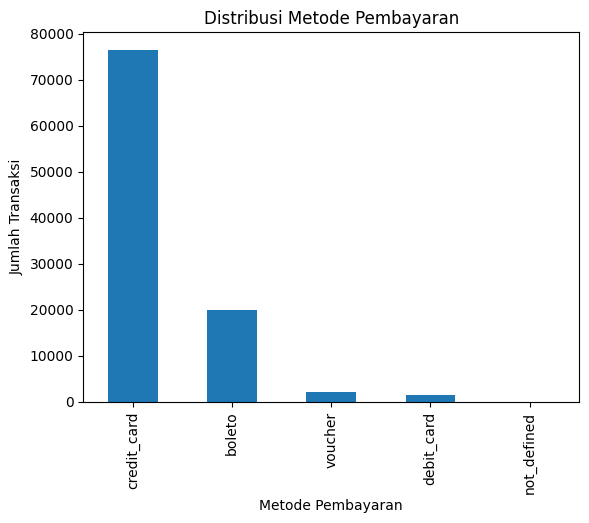

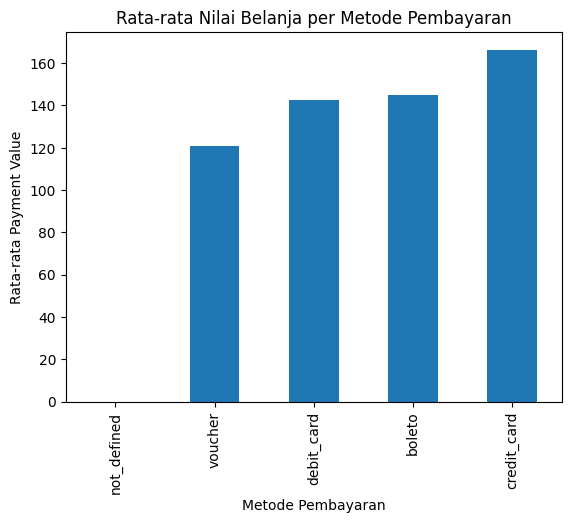

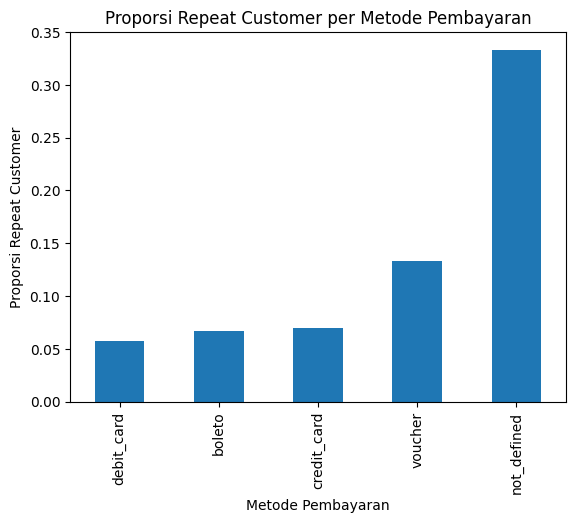

<Figure size 640x480 with 0 Axes>

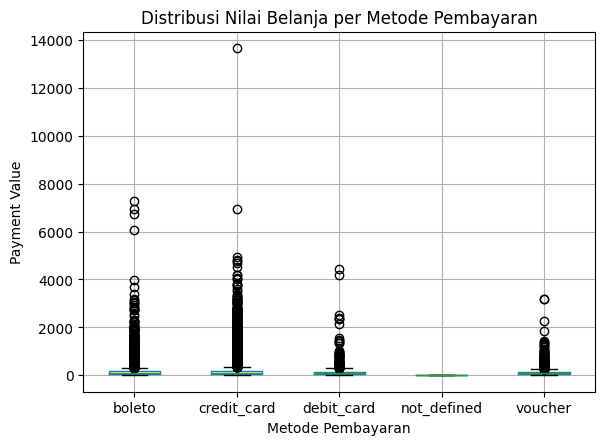


=== Rata-rata Nilai Belanja ===
payment_type
boleto         144.986413
credit_card    166.381215
debit_card     142.549628
not_defined      0.000000
voucher        120.590845
Name: payment_value, dtype: float64

=== Proporsi Repeat Customer ===
payment_type
boleto         0.066399
credit_card    0.069227
debit_card     0.057366
not_defined    0.333333
voucher        0.133135
Name: is_repeat_customer, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Load Data
# =========================
df = pd.read_csv("data/final_payment_psychology_dataset_pertanyaan2.csv")

print("Jumlah data:", df.shape)
print(df[["payment_type", "payment_value", "is_repeat_customer"]].head())

# =========================
# 1. Distribusi Metode Pembayaran
# =========================
plt.figure()
df["payment_type"].value_counts().plot(kind="bar")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

# =========================
# 2. Metode Pembayaran vs Nilai Belanja
# =========================
plt.figure()
df.groupby("payment_type")["payment_value"].mean().sort_values().plot(kind="bar")
plt.title("Rata-rata Nilai Belanja per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Payment Value")
plt.show()

# =========================
# 3. Metode Pembayaran vs Loyalitas
# =========================
plt.figure()
df.groupby("payment_type")["is_repeat_customer"].mean().sort_values().plot(kind="bar")
plt.title("Proporsi Repeat Customer per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Proporsi Repeat Customer")
plt.show()

# =========================
# 4. Boxplot Nilai Belanja
# =========================
plt.figure()
df.boxplot(column="payment_value", by="payment_type")
plt.title("Distribusi Nilai Belanja per Metode Pembayaran")
plt.suptitle("")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Payment Value")
plt.show()

# =========================
# 5. Ringkasan Angka (untuk narasi)
# =========================
print("\n=== Rata-rata Nilai Belanja ===")
print(df.groupby("payment_type")["payment_value"].mean())

print("\n=== Proporsi Repeat Customer ===")
print(df.groupby("payment_type")["is_repeat_customer"].mean())


**Insight:**
- Keterlambatan pengiriman terbukti menurunkan rating pelanggan secara signifikan. Artinya, performa logistik adalah faktor utama dalam menjaga kepuasan dan reputasi bisnis.
- Metode pembayaran mencerminkan perilaku belanja yang berbeda. Pelanggan dengan metode tertentu cenderung memiliki nilai transaksi dan tingkat loyalitas yang lebih tinggi.

## Analisis Lanjutan (Opsional)

Analisis Deskriptif

In [ ]:
review_summary = df_delay.groupby("is_late")["review_score"].agg([
    "count",
    "mean",
    "median",
    "min",
    "max"
]).reset_index()

print(review_summary)

   is_late   count      mean  median  min  max
0    False  106018  4.135109     5.0  1.0  5.0
1     True    7113  2.256572     1.0  1.0  5.0


Analisis Payment Type vs Nilai Transaksi

In [ ]:
payment_summary = df_payment.groupby("payment_type")["payment_value"].agg([
    "count",
    "mean",
    "sum"
]).sort_values(by="mean", ascending=False)

print(payment_summary)


              count        mean          sum
payment_type                                
credit_card   76531  166.381215  12733320.75
boleto        19910  144.986413   2886679.49
debit_card     1534  142.549628    218671.13
voucher        2013  120.590845    242749.37
not_defined       3    0.000000         0.00


Manual Grouping Repeat Customer

In [ ]:
repeat_summary = pd.crosstab(
    df_payment["payment_type"],
    df_payment["is_repeat_customer"]
)

print(repeat_summary)

is_repeat_customer  False  True 
payment_type                    
boleto              18588   1322
credit_card         71233   5298
debit_card           1446     88
not_defined             2      1
voucher              1745    268


Binning Payment Value

In [ ]:
df_payment["payment_category"] = pd.cut(
    df_payment["payment_value"],
    bins=[0, 50, 200, 500, 1000, df_payment["payment_value"].max()],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

payment_binning = df_payment["payment_category"].value_counts()
print(payment_binning)

payment_category
Low          62536
Very Low     17074
Medium       16068
High          3134
Very High     1176
Name: count, dtype: int64


✅ 1️⃣ Untuk Pertanyaan 1 (Delay vs Review & Loyalitas)

In [121]:
delay_rate = df["is_late"].mean() * 100

In [122]:
pd.crosstab(df["is_late"], df["is_repeat_customer"], normalize="index")

is_repeat_customer,False,True
is_late,,
0,0.929401,0.070599
1,0.941947,0.058053


In [128]:
late_repeat_pct = (
    pd.crosstab(df["is_late"], df["is_repeat_customer"], normalize="index")
    * 100
).round(2)

late_repeat_pct

is_repeat_customer,False,True
is_late,,
0,92.94,7.06
1,94.19,5.81


In [129]:
late_repeat_pct = (
    pd.crosstab(df["is_late"], df["is_repeat_customer"], normalize="index")
    * 100
).round(2)

late_repeat_pct.columns = ["Not Repeat (%)", "Repeat (%)"]
late_repeat_pct.index = ["On Time", "Late"]

late_repeat_pct

,Not Repeat (%),Repeat (%)
On Time,92.94,7.06
Late,94.19,5.81


✅ 2️⃣ Untuk Pertanyaan 2 (Payment Type & Loyalitas)

In [124]:
repeat_rate = df.groupby("payment_type")["is_repeat_customer"].mean() * 100
print(repeat_rate)

payment_type
boleto          6.557113
credit_card     7.068616
debit_card      5.797101
not_defined    33.333333
voucher        12.755356
Name: is_repeat_customer, dtype: float64


In [125]:
repeat_rate = (
    df.groupby("payment_type")["is_repeat_customer"]
      .mean()
      .mul(100)
      .sort_values(ascending=False)
)

print(repeat_rate)

payment_type
not_defined    33.333333
voucher        12.755356
credit_card     7.068616
boleto          6.557113
debit_card      5.797101
Name: is_repeat_customer, dtype: float64


In [126]:
repeat_rate = (
    df.groupby("payment_type")["is_repeat_customer"]
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .round(2)
)

print(repeat_rate)

payment_type
not_defined    33.33
voucher        12.76
credit_card     7.07
boleto          6.56
debit_card      5.80
Name: is_repeat_customer, dtype: float64


In [127]:
repeat_rate_df = repeat_rate.reset_index()
repeat_rate_df.columns = ["payment_type", "repeat_rate (%)"]

repeat_rate_df

,payment_type,repeat_rate (%)
0,not_defined,33.33
1,voucher,12.76
2,credit_card,7.07
3,boleto,6.56
4,debit_card,5.80


## Conclusion

Conclution pertanyaan 1 :
Pengaruh Keterlambatan terhadap Review, Nilai Transaksi, dan Repeat Order (2017–2018)
Berdasarkan hasil eksplorasi data periode 2017–2018:
- Dari total 113.092 pesanan, 6,45% mengalami keterlambatan, sementara 93,55% dikirim tepat waktu.
- Rata-rata review score pesanan tepat waktu adalah 4,13, sedangkan pesanan terlambat hanya 2,26.
➜ Terjadi penurunan kepuasan sebesar 1,87 poin, yang tergolong sangat signifikan secara bisnis.
- Rata-rata nilai transaksi pada pesanan terlambat (125,48) sedikit lebih tinggi dibanding pesanan tepat waktu (120,58).
- Repeat rate pelanggan tepat waktu sebesar 7,06%, sedangkan pelanggan yang menerima pesanan terlambat hanya 5,81%.

Conclution pertanyaan 2 :
Perbedaan Nilai Transaksi dan Loyalitas Berdasarkan Metode Pembayaran (2017–2018)
Hasil analisis menunjukkan:
- Metode pembayaran paling banyak digunakan adalah credit_card (70.042 transaksi).
- Rata-rata nilai transaksi tertinggi terdapat pada credit_card (166,38), diikuti boleto (144,99).
- Repeat rate tertinggi secara realistis (mengabaikan not_defined karena hanya 3 transaksi) adalah:
    - voucher: 12,76%
    - credit_card: 7,07%
    - boleto: 6,56%
    - debit_card: 5,80%